In [45]:
#import libraries
import pandas as pd
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import plotly.graph_objects as go

In [2]:
#load dataset
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#create target passed which is >= 60
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['passed'] = (df['average_score'] >= 60).astype(int)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,passed
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,0
4,male,group C,some college,standard,none,76,78,75,76.333333,1


In [4]:
df['test preparation course'] = df['test preparation course'].map({
    'none': 0,
    'completed': 1
})
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,passed
0,female,group B,bachelor's degree,standard,0,72,72,74,72.666667,1
1,female,group C,some college,standard,1,69,90,88,82.333333,1
2,female,group B,master's degree,standard,0,90,95,93,92.666667,1
3,male,group A,associate's degree,free/reduced,0,47,57,44,49.333333,0
4,male,group C,some college,standard,0,76,78,75,76.333333,1


In [5]:
#encode the categorical data
categories_data = ['gender', 'race/ethnicity', 'parental level of education', 'lunch']
for col in categories_data:
    df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,passed
0,0,1,1,1,0,72,72,74,72.666667,1
1,0,2,4,1,1,69,90,88,82.333333,1
2,0,1,3,1,0,90,95,93,92.666667,1
3,1,0,0,0,0,47,57,44,49.333333,0
4,1,2,4,1,0,76,78,75,76.333333,1


In [7]:
#create features and target
X = df.drop(columns=['average_score', 'passed'])
y = df['passed']

In [9]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
#intialize RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
rf_y_pred = rf_model.predict(X_test)

In [16]:
print("Accuracy Score:", accuracy_score(y_test, rf_y_pred))
print("\nClassification Report\n", classification_report(y_test, rf_y_pred))

Accuracy Score: 0.985

Classification Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        62
           1       1.00      0.98      0.99       138

    accuracy                           0.98       200
   macro avg       0.98      0.99      0.98       200
weighted avg       0.99      0.98      0.99       200



In [18]:
scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross validation score:", scores)
print(scores.mean())

Cross validation score: [0.995 0.955 0.985 0.99  0.995]
0.984


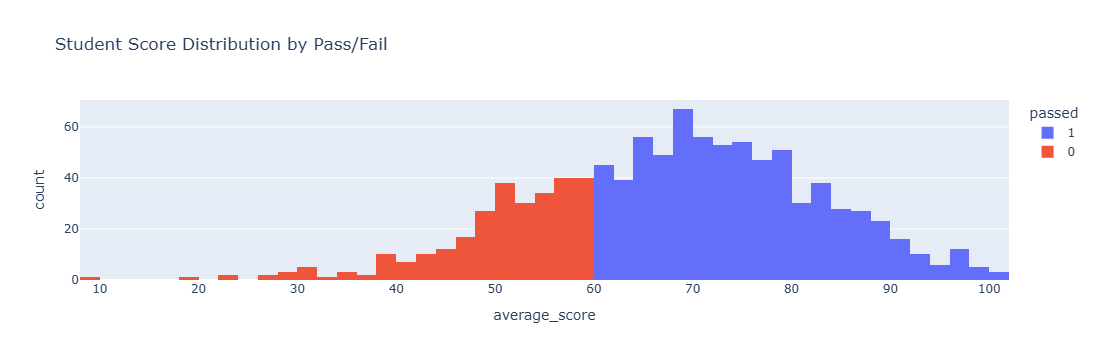

In [22]:
fig = px.histogram(
    df,
    x='average_score',
    color='passed',
    title='Student Score Distribution by Pass/Fail'
)
fig.show()

In [25]:
#initialize DecisionTreeClassifier
dfc_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dfc_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:
dfc_y_pred = dfc_model.predict(X_test)

In [30]:
print("Accuracy Score:", accuracy_score(y_test, dfc_y_pred))
print("\nClassification Report\n", classification_report(y_test, dfc_y_pred))

Accuracy Score: 0.95

Classification Report
               precision    recall  f1-score   support

           0       0.91      0.94      0.92        62
           1       0.97      0.96      0.96       138

    accuracy                           0.95       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.95      0.95       200



In [53]:
#initialize SVC model
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [54]:
svc_y_pred = svc_model.predict(X_test)

In [55]:
print("Accuracy Score:", accuracy_score(y_test, svc_y_pred))
print("\nClassification Report\n", classification_report(y_test, svc_y_pred))

Accuracy Score: 1.0

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       138

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



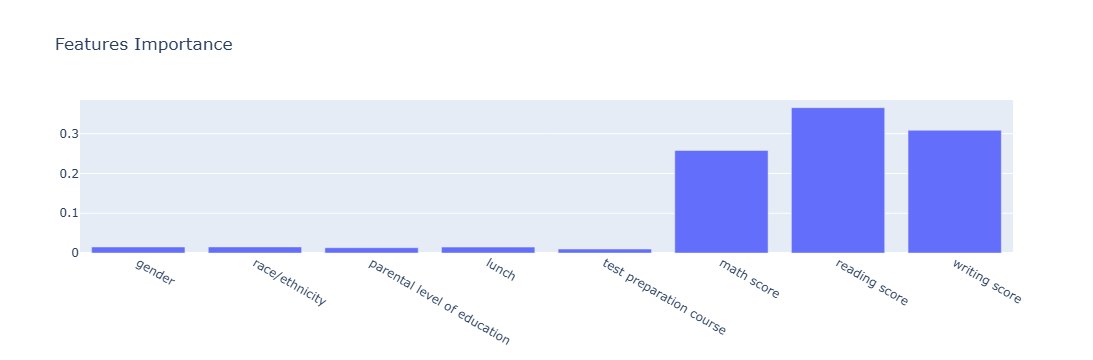

In [56]:
#check for most importance feature
importance = rf_model.feature_importances_
features = X.columns

fig = go.Figure([go.Bar(x=features, y=importance)])
fig.update_layout(title='Features Importance')
fig.show()

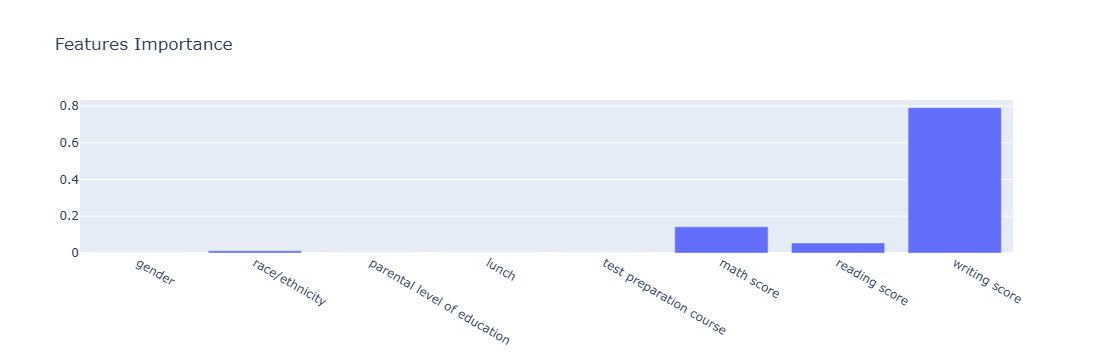

In [57]:
importance = dfc_model.feature_importances_
features = X.columns

fig = go.Figure([go.Bar(x=features, y=importance)])
fig.update_layout(title='Features Importance')
fig.show()